# Challenge - Rainy Day

![](https://images.unsplash.com/photo-1558920778-a82b686f0521?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=967&q=80)

Photo by [Ren zo](https://unsplash.com/photos/rsilYJQOoVo)

In this exercise, we will try to use a neural network on a typical prediction task: predicting whether tomorrow will be a rainy day.

The dataset is in `weatherAUS.csv`. Load it and explore it. The target value is the column `'RainTomorrow'`.

In [224]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer

In [225]:
data = pd.read_csv('/home/guillaume/code/GGIML/vivadata-student/data/weatherAUS/weatherAUS.csv')

In [226]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [227]:
# TODO: Data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [228]:
data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Make data preparation.

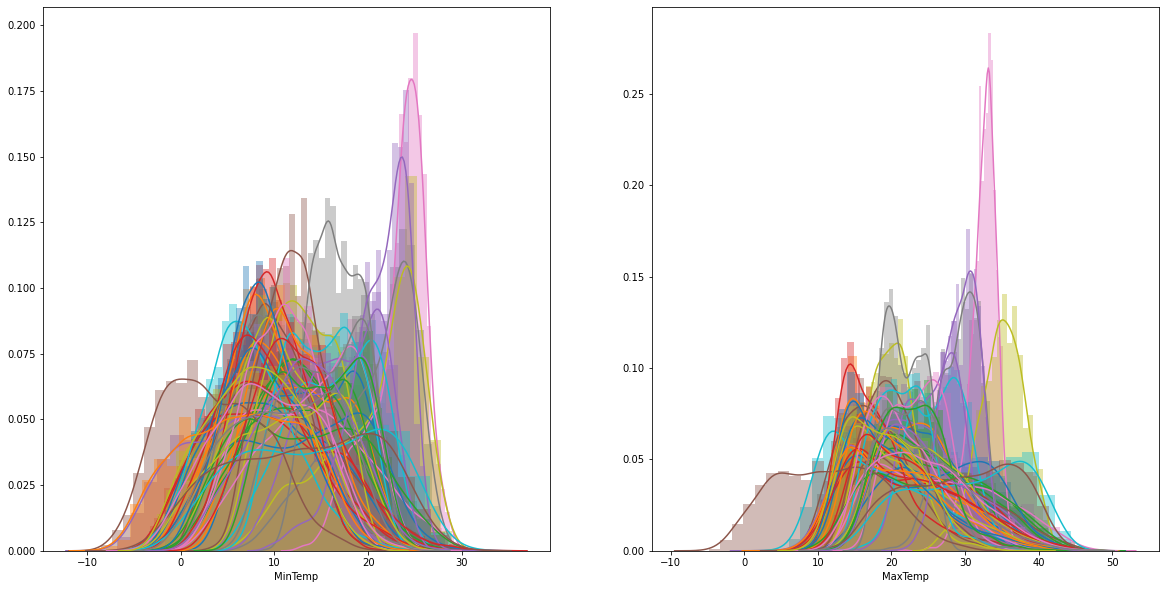

In [229]:
# TODO: Data preparation
plt.figure(figsize=(20,10))
plt.subplot(121)
for location in set(data.Location.values):
    sns.distplot(data[data.Location == location].MinTemp)
plt.subplot(122)
for location in set(data.Location.values):
    sns.distplot(data[data.Location == location].MaxTemp)

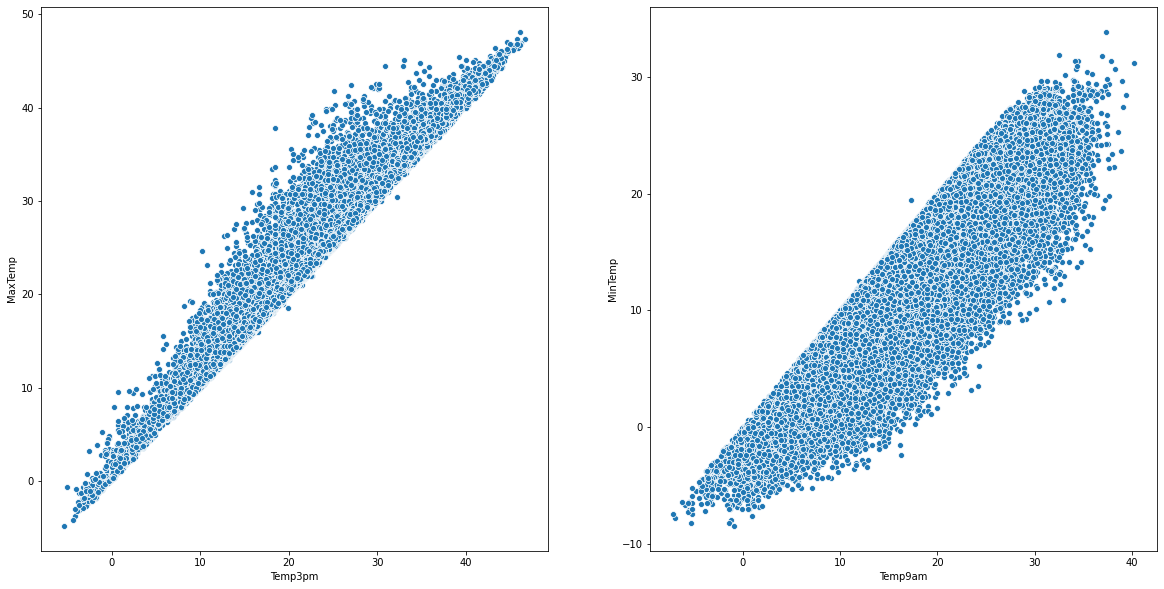

In [230]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.scatterplot(data.Temp3pm, data.MaxTemp)
plt.subplot(122)
sns.scatterplot(data.Temp9am, data.MinTemp)

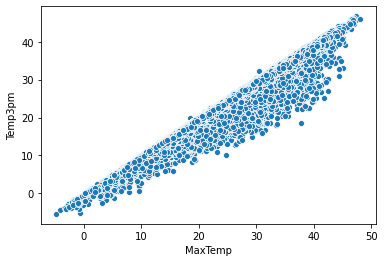

In [231]:
sns.scatterplot(data.MaxTemp, data.Temp3pm)

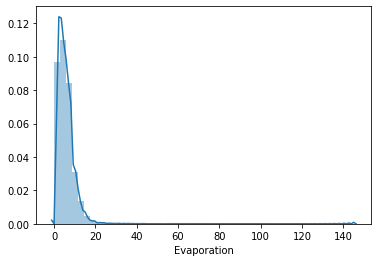

In [232]:
sns.distplot(data.Evaporation)

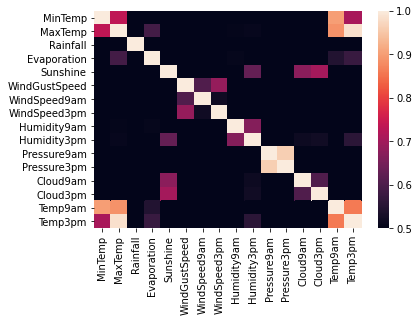

In [233]:
corr = data.corr()
sns.heatmap(abs(corr), vmin=0.5)

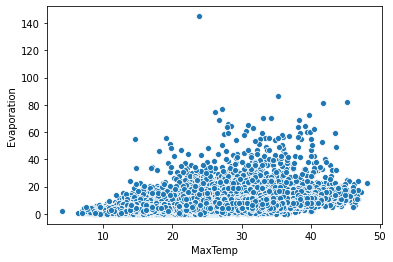

In [234]:
sns.scatterplot(data.MaxTemp, data.Evaporation)

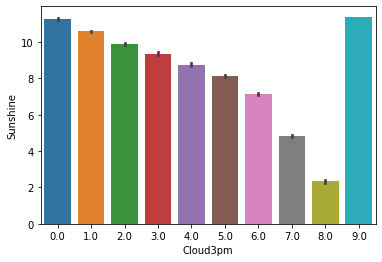

In [235]:
sns.barplot(data.Cloud3pm, data.Sunshine)

In [236]:
data[(data.Temp9am.isna()) & (data.Temp3pm.isna())]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3350,2009-12-12,BadgerysCreek,NaN,32.6,NaN,NaN,NaN,SSE,43.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3395,2010-01-30,BadgerysCreek,19.6,28.2,NaN,NaN,NaN,NE,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3477,2010-05-07,BadgerysCreek,4.4,22.9,NaN,NaN,NaN,WSW,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7876,2014-07-26,Cobar,NaN,NaN,0.0,3.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,No,No
7877,2014-07-27,Cobar,NaN,18.9,0.0,4.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140573,2017-03-16,Katherine,NaN,36.0,0.0,NaN,NaN,NNW,19.0,NW,...,NaN,NaN,1008.4,1004.7,NaN,NaN,NaN,NaN,No,No
140575,2017-03-19,Katherine,NaN,36.0,NaN,NaN,NaN,NNE,48.0,NE,...,NaN,NaN,1008.8,1006.1,NaN,NaN,NaN,NaN,NaN,Yes
140597,2017-04-10,Katherine,NaN,35.5,0.0,NaN,NaN,E,48.0,SE,...,NaN,NaN,1009.6,1005.7,NaN,NaN,NaN,NaN,No,No
140614,2017-04-27,Katherine,NaN,35.0,0.0,NaN,NaN,ESE,44.0,ESE,...,NaN,NaN,1014.3,1011.0,NaN,NaN,NaN,NaN,No,No


In [275]:
data.dropna(subset=['MinTemp', 'MaxTemp', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=0, inplace=True)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123583 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123583 non-null  object 
 1   Location       123583 non-null  object 
 2   MinTemp        123583 non-null  float64
 3   MaxTemp        123583 non-null  float64
 4   Rainfall       123583 non-null  float64
 5   Evaporation    73001 non-null   float64
 6   Sunshine       67047 non-null   float64
 7   WindGustDir    123583 non-null  object 
 8   WindGustSpeed  123583 non-null  float64
 9   WindDir9am     123583 non-null  object 
 10  WindDir3pm     123583 non-null  object 
 11  WindSpeed9am   123583 non-null  float64
 12  WindSpeed3pm   123583 non-null  float64
 13  Humidity9am    122603 non-null  float64
 14  Humidity3pm    122103 non-null  float64
 15  Pressure9am    114471 non-null  float64
 16  Pressure3pm    114520 non-null  float64
 17  Cloud9am       77408 non-null

In [278]:
X = data.drop(['RainTomorrow', 'Date', 'Location'], axis=1)
y = data.RainTomorrow

In [305]:
y = LabelEncoder().fit_transform(y)

In [307]:
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [308]:
num_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]

In [309]:
object_cols = [col for col in X.columns if col not in num_cols]

In [310]:
pipe_num = Pipeline([('imputer', IterativeImputer(max_iter=100)), ('scaler', StandardScaler())])

In [311]:
pipe_obj = Pipeline([('onehot', OneHotEncoder(drop='first'))])

In [312]:
from sklearn.compose import ColumnTransformer

In [313]:
transformer = ColumnTransformer([('num_transformer', pipe_num, num_cols),
                                ('cat_transformer', pipe_obj, object_cols)])

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [316]:
X_train = transformer.fit_transform(X_train)

In [317]:
X_test = transformer.transform(X_test)

Now build a MLP model. Begin with for example 2 hidden layers of 20 units.

In [318]:
# TODO: Build a model
def multilayer_perceptron(input_dim):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(20, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(20, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    return model

Now compile and fit your model.

In [319]:
# TODO: Compile and fit the model
model = multilayer_perceptron(62)

In [321]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [323]:
model.fit(X_train, y_train, epochs=50, batch_size=12, validation_data=(X_test, y_test))

Epoch 1/50
8239/8239 [==============================] - 7s 802us/step - loss: 0.3334 - accuracy: 0.8592 - val_loss: 0.3437 - val_accuracy: 0.8538
Epoch 2/50
8239/8239 [==============================] - 7s 805us/step - loss: 0.3357 - accuracy: 0.8579 - val_loss: 0.3499 - val_accuracy: 0.8526
Epoch 3/50
8239/8239 [==============================] - 7s 802us/step - loss: 0.3366 - accuracy: 0.8573 - val_loss: 0.3479 - val_accuracy: 0.8525
Epoch 4/50
8239/8239 [==============================] - 7s 803us/step - loss: 0.3372 - accuracy: 0.8577 - val_loss: 0.3475 - val_accuracy: 0.8535
Epoch 5/50
8239/8239 [==============================] - 7s 850us/step - loss: 0.3383 - accuracy: 0.8576 - val_loss: 0.3441 - val_accuracy: 0.8518
Epoch 6/50
8239/8239 [==============================] - 7s 847us/step - loss: 0.3387 - accuracy: 0.8574 - val_loss: 0.3489 - val_accuracy: 0.8527
Epoch 7/50
8239/8239 [==============================] - 7s 850us/step - loss: 0.3402 - accuracy: 0.8574 - val_loss: 0.3421 -

Now check the accuracy on the test dataset.

In [330]:
# TODO: Compute the accuracy

loss_test, test_acc = model.evaluate(X_test, y_test, verbose=0)
loss_train, train_acc = model.evaluate(X_train, y_train, verbose=0)

print('Test Accuracy ', test_acc)
print('Train Accuracy ', train_acc)

Test Accuracy  0.8526520133018494
Train Accuracy  0.8575951457023621


---

Now try to use a classical machine learning classification method (of your choice). Make the fit and compute the accuracy of your model.

In [332]:
# TODO: Redo the classification with the model of your choice
from lightgbm import LGBMRegressor

lgbr = LGBMRegressor(n_jobs=-1)
lgbr.fit(X_train, y_train)

LGBMRegressor()

In [334]:
lgbr.score(X_test, y_test)

0.40454907542817287

In [335]:
lgbr.score(X_train, y_train)

0.44864089465506785